In [1]:
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(42)

In [ ]:
employee_ids=[f"EMP_{i:03d}" for i in range (1,31)]

In [25]:
dates = pd.date_range("2025-07-01",periods=31, freq="D")

In [26]:
#Simulate working hours(between 4 and 10 hours/day)
data= {
       "Date": np.tile(dates,len(employee_ids)),
       "Employee_ID": np.repeat(employee_ids, len(dates)),
       "Working_Hours": np.random.uniform(4, 10, size=len(dates) * len(employee_ids)).round(2)
}

In [27]:
df=pd.DataFrame(data)

In [28]:
#Save to CSV
df.to_csv("employee_working_hours.csv",index=False)

In [29]:
#Read from CSV
df_csv=pd.read_csv("employee_working_hours.csv")

In [32]:
#Analyze the Data
#a. Basic Exploration
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     930.000000
mean        6.951441
std         1.756154
min         4.030000
25%         5.420000
50%         6.990000
75%         8.487500
max        10.000000
30


In [35]:
#b. Grouping and Aggregation
# Total hours per employee
total_hours = df_csv.groupby("Employee_ID")[ "Working_Hours"].sum().sort_values(ascending=False)

In [36]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [37]:
threshold_low = 5 
threshold_high = 9

In [38]:
df_csv["Low_Hour_Flag"] = df_csv["Working_Hours"] < threshold_low 
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"] > threshold_high 

In [39]:
print(df_csv[df_csv["Low_Hour_Flag"] | 
df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001           9.70          False            True
4  2025-07-05     EMP_001           4.94           True           False
5  2025-07-06     EMP_001           4.94           True           False
6  2025-07-07     EMP_001           4.35           True           False
7  2025-07-08     EMP_001           9.20          False            True


In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns

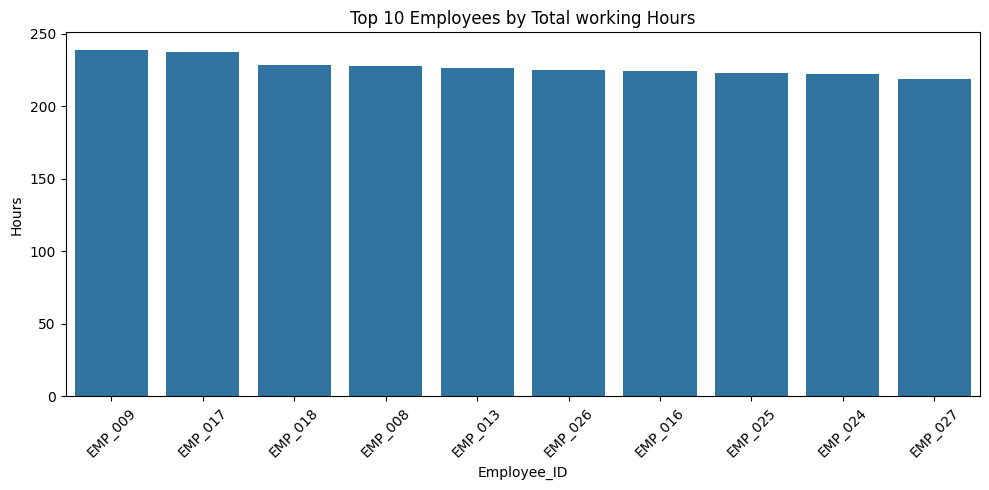

In [41]:
top10 = total_hours.head(10) 
plt.figure(figsize=(10,5)) 
sns.barplot(x=top10.index, y=top10.values) 
plt.xticks(rotation=45) 
plt.title("Top 10 Employees by Total working Hours") 
plt.ylabel("Hours") 
plt.tight_layout() 
plt.show() 

In [42]:
row = df.iloc[52]
row

Date             2025-07-22 00:00:00
Employee_ID                  EMP_002
Working_Hours                   9.64
Name: 52, dtype: object

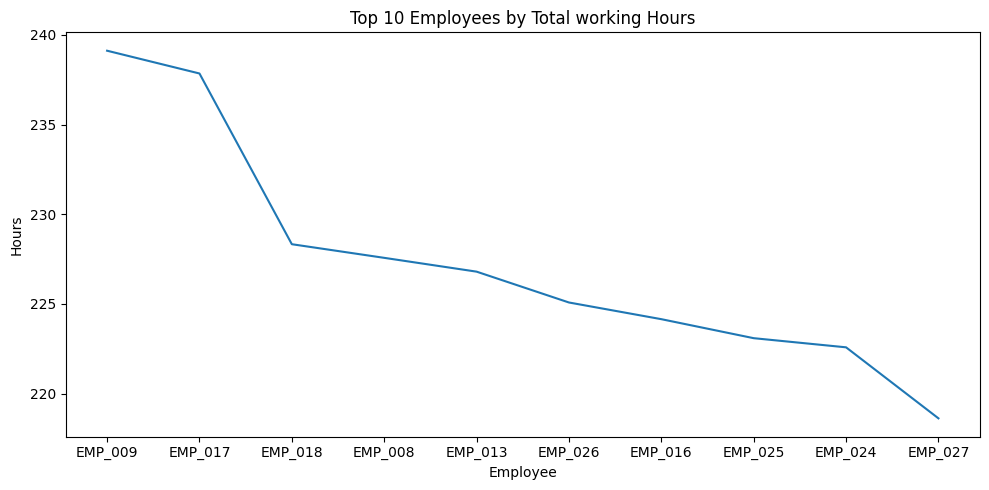

In [44]:
top10 = total_hours.head(10) 
plt.figure(figsize=(10,5)) 
sns.lineplot(x=top10.index, y=top10.values) 
plt.title("Top 10 Employees by Total working Hours") 
plt.xlabel("Employee")
plt.ylabel("Hours") 
plt.tight_layout() 
plt.show() 